We finally get to fit the model to our grade data and
see how well it does at predicting the final grade

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

#bring in all your previous parts of data science workflow to use in final modeling
import env
import wrangle_grades
import split_scale
import features

In [2]:
df=wrangle_grades.wrangle_grades()
df.head()

exam1  exam2  exam3  final_grade
0    100     90     95           96
1     98     93     96           95
2     85     83     87           87
3     83     80     86           85
4     93     90     96           97

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 4 columns):
exam1          102 non-null int64
exam2          102 non-null int64
exam3          102 non-null int64
final_grade    102 non-null int64
dtypes: int64(4)
memory usage: 4.0 KB


In [4]:
train,test=split_scale.split_my_data(df)

In [5]:
scaler,train,test=split_scale.standard_scaler(train,test)

In [6]:
X_train=train.drop(columns=['final_grade'])
X_test=test.drop(columns=['final_grade'])
y_train=train[['final_grade']]
y_test=test[['final_grade']]

In [7]:
number_of_features=features.optimal_number_of_features(X_train,y_train,X_test,y_test)
selected_features=features.optimal_features(X_train,y_train,number_of_features)
selected_features
X_train=X_train[selected_features]
X_test=X_test[selected_features]

Now that all the preprocessing and feature engineering is done we can fit the Linear Regression

In [8]:
lm1=LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's look at the values the lm model generates

In [9]:
lm1_y_intercept=lm1.intercept_
print("intercept: ",lm1_y_intercept)
lm1_coefficents=lm1.coef_
print("coefficents: ",lm1_coefficents)

intercept:  [1.50378128e-16]
coefficents:  [[0.78888818 0.20816561]]


In [12]:
#regression equation where m1 and m2 are coefficents from above and b is intercept
print('{}=b+m1*{}+m2*{}'.format(y_train.columns[0],X_train.columns[0],X_train.columns[1]))

final_grade=b+m1*exam1+m2*exam3


In [13]:
#Note that the curriculum does not use the right X split
y_pred_lm1=lm1.predict(X_test)

In [22]:
mse_lm1=mean_squared_error(y_test,y_pred_lm1)
print("linear model \n mean_squared error: {:.3}".format(mse_lm1))

r2_lm1=r2_score(y_test,y_pred_lm1)
print('{:.2%} of the variance in the student''s final grade can be explained by the grades on exam1 and exam 3'.format(r2_lm1))


linear model 
 mean_squared error: 0.0379
96.80% of the variance in the students final grade can be explained by the grades on exam1 and exam 3


In [29]:
#Establishing the baseline model for comparison
y_pred_baseline=np.array([y_test.mean()[0]]*len(y_test))
MSE = mean_squared_error(y_test, y_pred_baseline)
SSE = MSE*len(y_test)
RMSE = sqrt(MSE)
evs=explained_variance_score(y_test,y_pred_baseline)

In [33]:
print(evs)
print(SSE)

0.0
24.85084322622909


In [48]:
test_unscaled=pd.DataFrame(scaler.inverse_transform(test),columns=test.columns.values).set_index([test.index.values])
y_unscaled=test_unscaled['final_grade']

test_pred['final_grade']=y_pred_lm1
test_pred1=pd.DataFrame(scaler.inverse_transform(test_pred),columns=test.columns.values).set_index([test.index.values])
y_lm1_unscaled = test_pred1['final_grade']


test_pred_baseline = test.drop(columns='final_grade')
test_pred_baseline['final_grade'] = y_pred_baseline
test_pred_baseline = pd.DataFrame(scaler.inverse_transform(test_pred_baseline), columns=test.columns.values).set_index([test.index.values])
y_baseline_unscaled = test_pred_baseline['final_grade']

In [49]:
pd.DataFrame({'actual': y_unscaled,
             'lm1': y_lm1_unscaled.ravel(),
             'lm_baseline':y_baseline_unscaled.ravel()})

actual        lm1  lm_baseline
10    68.0  65.528539     86.52381
73    77.0  74.974967     86.52381
91    96.0  97.808844     86.52381
30    97.0  93.775905     86.52381
65    96.0  97.808844     86.52381
0     96.0  97.808844     86.52381
5     81.0  82.320520     86.52381
52    96.0  97.808844     86.52381
84    93.0  92.641061     86.52381
4     97.0  93.775905     86.52381
25    72.0  74.974967     86.52381
67    87.0  86.522271     86.52381
79    95.0  96.842812     86.52381
62    68.0  65.528539     86.52381
26    96.0  97.808844     86.52381
44    81.0  82.320520     86.52381
90    72.0  74.974967     86.52381
40    95.0  96.842812     86.52381
58    93.0  92.641061     86.52381
78    96.0  97.808844     86.52381
37    65.0  66.218814     86.52381

In [45]:
y_lm1_unscaled.ravel()

array([65.52853943, 74.97496743, 97.80884353, 93.77590457, 97.80884353,
       97.80884353, 82.32051973, 97.80884353, 92.6410605 , 93.77590457,
       74.97496743, 86.52227113, 96.8428119 , 65.52853943, 97.80884353,
       82.32051973, 74.97496743, 96.8428119 , 92.6410605 , 97.80884353,
       66.21881448])

In [46]:
y_baseline_unscaled.ravel()

array([86.52380952, 86.52380952, 86.52380952, 86.52380952, 86.52380952,
       86.52380952, 86.52380952, 86.52380952, 86.52380952, 86.52380952,
       86.52380952, 86.52380952, 86.52380952, 86.52380952, 86.52380952,
       86.52380952, 86.52380952, 86.52380952, 86.52380952, 86.52380952,
       86.52380952])

In [50]:
pd.DataFrame({'actual': y_unscaled,
             'lm1': y_lm1_unscaled.ravel(),
             'lm_baseline':y_baseline_unscaled.ravel()})\
.melt(id_vars=['actual'],var_name='model',value_name='prediction')

actual        model  prediction
0     68.0          lm1   65.528539
1     77.0          lm1   74.974967
2     96.0          lm1   97.808844
3     97.0          lm1   93.775905
4     96.0          lm1   97.808844
5     96.0          lm1   97.808844
6     81.0          lm1   82.320520
7     96.0          lm1   97.808844
8     93.0          lm1   92.641061
9     97.0          lm1   93.775905
10    72.0          lm1   74.974967
11    87.0          lm1   86.522271
12    95.0          lm1   96.842812
13    68.0          lm1   65.528539
14    96.0          lm1   97.808844
15    81.0          lm1   82.320520
16    72.0          lm1   74.974967
17    95.0          lm1   96.842812
18    93.0          lm1   92.641061
19    96.0          lm1   97.808844
20    65.0          lm1   66.218814
21    68.0  lm_baseline   86.523810
22    77.0  lm_baseline   86.523810
23    96.0  lm_baseline   86.523810
24    97.0  lm_baseline   86.523810
25    96.0  lm_baseline   86.523810
26    96.0  lm_baseline   86.523810
27    81.0  lm_baseline   86.523810
28    96.0  lm_baseline   86.523810
29    93.0  lm_baseline   86.523810
30    97.0  lm_baseline   86.523810
31    72.0  lm_baseline   86.523810
32    87.0  lm_baseline   86.523810
33    95.0  lm_baseline   86.523810
34    68.0  lm_baseline   86.523810
35    96.0  lm_baseline   86.523810
36    81.0  lm_baseline   86.523810
37    72.0  lm_baseline   86.523810
38    95.0  lm_baseline   86.523810
39    93.0  lm_baseline   86.523810
40    96.0  lm_baseline   86.523810
41    65.0  lm_baseline   86.523810

Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

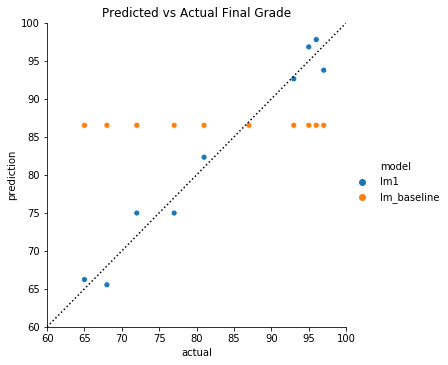

In [52]:
pd.DataFrame({'actual': y_unscaled,
             'lm1': y_lm1_unscaled.ravel(),
             'lm_baseline':y_baseline_unscaled.ravel()})\
.melt(id_vars=['actual'],var_name='model',value_name='prediction')\
.pipe((sns.relplot,'data'),x='actual',y='prediction',hue='model')
min, max = 60, 100
plt.plot([min, max], [min, max], c='black', ls=':')
plt.ylim(min, max)
plt.xlim(min, max)
plt.title('Predicted vs Actual Final Grade')